# 🎬 Étude de marché – Cinéma dans la Creuse

## Objectif
Comprendre le public local du département de la Creuse afin d’adapter
la programmation du cinéma et construire un système de recommandation pertinent.

## Contexte
Le cinéma fait face à une baisse de fréquentation.
Avant d’utiliser les données IMDb et TMDB, il est nécessaire de comprendre
les habitudes culturelles et démographiques locales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
#ÉTAPE 1 : ANALYSE DÉMOGRAPHIQUE 
# Source des données : Insee, RP2022 exploitation principale (Département de la Creuse)

data_age = {
    'Tranche_age': ['0-14 ans', '15-29 ans', '30-44 ans', '45-59 ans', '60-74 ans', '75-89 ans', '90+'],
    'Hommes': [7599, 7501, 8511, 11791, 14076, 6105, 767], # Donnees tableau POP T3
    'Femmes': [7397, 6628, 8164, 11872, 14381, 8631, 2105]  # Donnees tableau POP T3
}


print("Source des données : INSEE - Recensement de la population 2022")

Source des données : INSEE - Recensement de la population 2022


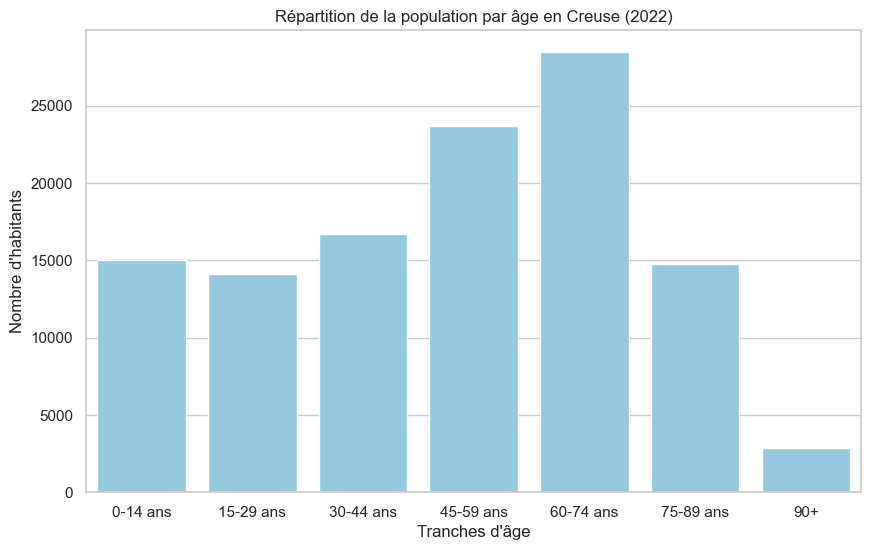

Conclusion : La population est vieillissante. Les plus de 60 ans sont les plus nombreux.


In [3]:
df_age = pd.DataFrame(data_age)

#  (Total) 
df_age['Total'] = df_age['Hommes'] + df_age['Femmes']

# 2. Création du graphique 
plt.figure(figsize=(10, 6))
sns.barplot(x='Tranche_age', y='Total', data=df_age, color='skyblue')
plt.title('Répartition de la population par âge en Creuse (2022)')
plt.xlabel('Tranches d\'âge')
plt.ylabel('Nombre d\'habitants')

plt.show()

# 3. Conclusion pour le client 
print("Conclusion : La population est vieillissante. Les plus de 60 ans sont les plus nombreux.")

In [4]:
# ÉTAPE 2 : ANALYSE DES REVENUS ET PAUVRETÉ ---
# Source des données : Insee, Fichier localisé social et fiscal (Filosofi) 2021

# 1. Création d'un petit tableau pour les revenus 
data_revenu = {
    'Indicateur': ['Revenu disponible médian', 'Taux de pauvreté global'],
    'Valeur': [20620, 19.2] # Donnees tableau REV T1 и REV G1, INSEE
}

df_rev = pd.DataFrame(data_revenu)

# 2. Affichage des résultats 
print("Résumé des revenus en Creuse :")
print(f"- Le revenu médian est de {df_rev.iloc[0]['Valeur']} € par an.")
print(f"- Le taux de pauvreté moyen est de {df_rev.iloc[1]['Valeur']} %.")

# 3. Pourquoi c'est important ? 
# Explication dans 'print'
print("\nConclusion pour le projet :")
print("Le budget des habitants est limité. Le site doit proposer des tarifs réduits,")
print("surtout pour les moins de 30 ans qui sont les plus touchés par la pauvreté (25,3%).")

Résumé des revenus en Creuse :
- Le revenu médian est de 20620.0 € par an.
- Le taux de pauvreté moyen est de 19.2 %.

Conclusion pour le projet :
Le budget des habitants est limité. Le site doit proposer des tarifs réduits,
surtout pour les moins de 30 ans qui sont les plus touchés par la pauvreté (25,3%).


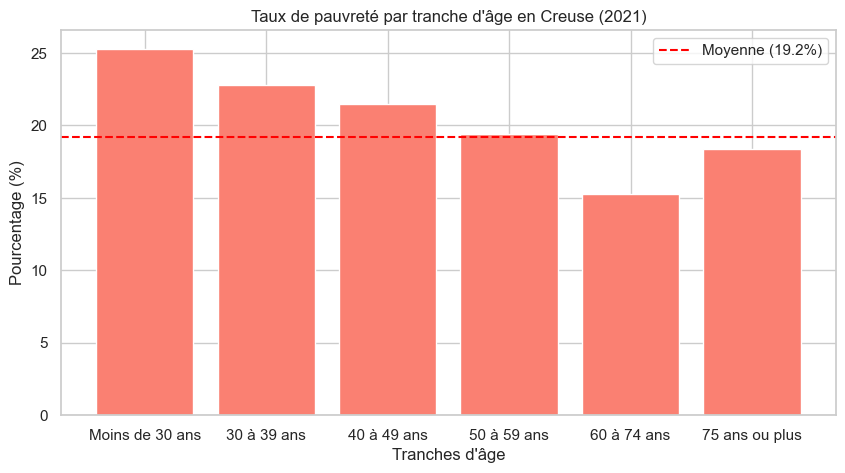

In [5]:
# ÉTAPE 2.1 : VISUALISATION DE LA PAUVRETÉ ---
# Donnees tableau REV G1, INSEE

data_pauvrete = {
    'Tranche_age': ['Moins de 30 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 74 ans', '75 ans ou plus'],
    'Taux_pourcentage': [25.3, 22.8, 21.5, 19.4, 15.3, 18.4] # Tableau REV G1
}

df_pauvrete = pd.DataFrame(data_pauvrete)


plt.figure(figsize=(10, 5))
plt.bar(df_pauvrete['Tranche_age'], df_pauvrete['Taux_pourcentage'], color='salmon')

plt.title('Taux de pauvreté par tranche d\'âge en Creuse (2021)')
plt.ylabel('Pourcentage (%)')
plt.xlabel('Tranches d\'âge')

# Добавляем горизонтальную линию среднего уровня (19.2%), чтобы было с чем сравнивать
plt.axhline(y=19.2, color='red', linestyle='--', label='Moyenne (19.2%)')
plt.legend() # Pour montre identification pour ligne rouge

plt.show()

In [6]:
#ÉTAPE 3 : ANALYSE DE LA FRÉQUENTATION (CNC) 


# 1. Liens des sources 
source_cnc_geo = "https://www.cnc.fr/professionnels/etudes-et-rapports/statistiques/geographie-du-cinema"
source_cnc_actu = "https://www.cnc.fr/professionnels/actualites/frequentation-cinematographique-en-2024"

# 2. Données clés 
print("--- ANALYSE DE LA FRÉQUENTATION ---")
# 181 millions ticket vendu en France
print(f"- Fréquence nationale 2024 : 181 millions d'entrées.")
# Пожилые люди ходят в кино 6.3 раза в год
print(f"- Les 60 ans et plus : 6,3 entrées/an (Public cible en Creuse).")
# Рост залов Art et Essai
print(f"- Croissance du public 'Art et Essai' : +2,9%.")

# 3. Affichage des liens 
print("\n--- SOURCES OFFICIELLES (LIENS) ---")
print(f"1. Géographie du cinéma : {source_cnc_geo}")
print(f"2. Bilan de fréquentation 2024 : {source_cnc_actu}")

# 4. Conclusion Stratégique 
print("\n--- STRATÉGIE POUR LE PROJET ---")
print("Nous allons filtrer la base IMDb pour trouver des films 'Art et Essai'")
print("et des classiques qui plairont aux seniors de la Creuse.")

--- ANALYSE DE LA FRÉQUENTATION ---
- Fréquence nationale 2024 : 181 millions d'entrées.
- Les 60 ans et plus : 6,3 entrées/an (Public cible en Creuse).
- Croissance du public 'Art et Essai' : +2,9%.

--- SOURCES OFFICIELLES (LIENS) ---
1. Géographie du cinéma : https://www.cnc.fr/professionnels/etudes-et-rapports/statistiques/geographie-du-cinema
2. Bilan de fréquentation 2024 : https://www.cnc.fr/professionnels/actualites/frequentation-cinematographique-en-2024

--- STRATÉGIE POUR LE PROJET ---
Nous allons filtrer la base IMDb pour trouver des films 'Art et Essai'
et des classiques qui plairont aux seniors de la Creuse.
